## Matplotlib

Gammelt og stort library. Finnes flere måter å gjøre ting på. Har såkalt "state machine environment" i pyplot der jeg kan legge på ting i current figure og axes med plt.func() uten eksplisitt å lage fig/axes eller i det hele tatt referere til de. Dette ligner på syntax i matlab og er greit for rask scripting, men er det er u-pythonisk, lite intuitivt, og gir mindre kontroll. Foretrekker å lage objekt og jobbe med de eksplisitt.

Matplotlib ble utviklet før pandas og dataframes, så utnytter i liten grad at informasjon i denne strukturen (datatyper, kolonnenanvn, index) fasiliterer plots med få linjer av kode. I data-exploration kan det derfor være greit å bruke seaborn i stedet eller benytte plottefunksjonalitet i pandas som har matplotlib som back-end. Dessuten er det mange som mener at den har litt stygge defaults.

Når jeg bruker matplotlib vil jeg organisere plot i funksjoner. Da kan jeg bruke det litt på samme måte som high-level library, men med egne custom plots. Fordelen med dette er at jeg kan skjule mange implementasjonsdetaljer. Folk som er interessert i hvordan plot ble laget kan se på source code, andre kan bare se på figur. Kan også gjenbruke kode, for eksempel med små variasjon i input/parametre i samme script eller i ulike script. Jeg er litt usikker på hvordan jeg håndeterer dette best mulig objektorientert syntax; skal jeg sende ax-objekt frem og tilbake eksplisitt eller hva.. Må også ha balanse med hvor mye som blir spesifisert innad i funksjon og hva jeg spesifiserer utenfor.. kan bli veldig mange argumenter for tittel, labels osv, hvis alt må spesifisereres i funksjonen.

### Parametre

Noe av det fine med matplotlib er at den håndterer ting greit by default slik at vi ikke alltid må spesifisere hvordan hver detalj skal se ut. På en annen side er ikke default alltid det beste. Kan overkjøre det lokalt i hver figur med å spesifisere ting, men kan også være aktuelt å endre globale defaults på begynnelsen av scriptet.

Kan være greit å endre font med 
```python
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif" 
```
Kan også forsøke å bestemme default fontsize, padding og sånt. Alternativ måte:
```python
import matplotlib as mpl
mpl.rc('axes', labelsize=14) 
mpl.rc('xtick', labelsize=12)
...
```
men tror jeg det er bedre å endre tid gjennom rcParams som er en stor og feit dict med default parametre.

Det kan også være greit å ha litt bevisst forhold til figsize dersom figuren skal eksporteres. Selv om det ser bra ut på skjermen er det ikke sikkert at det blir bra dersom figuren blir strukket. Kan bli feil størrelse på labels og sånn. Litt usikker på hvordan jeg håndterer dette best mulig. Har lest at det er viktig å lagre figur som vector (eg. pdf) i stedet for statisk bilde (eg. png) siden det da er mulig å zoome uten at det blir pixelert. 

### Backend

```python
import matplotlib
matplotlib.use('nbagg')
```

tror jeg trenger denne backend for interaktive plot i jupyter... noe greier med javascript

### Anatomi til plot

Objektorintert oppbygning med hierarki der obkjekt er slags container for underliggende objekt..

1. Har figur som er slags ramme, har én eller flere axes objekt. 
2. Kan ha flere axes i samme figur... Hver axes container for xaxis og yaxis.. og andre ting. Merk at subplots er synonym på akse i grid på figur. Kun i spesialtilfelle at jeg vil jobbe med axes som ikke er på grid.

Mesteparten av action skjer på axes. Har
1. Plottefunksjoner
2. Customize egenskap til subobjekt. I stedet for å jobbe med disse eksplisitt kan jeg endre gjennom metoder på axes-objekt.
    - ax.set(foo='bar' ) # wrapper 
    - ax.set_foo('bar', kwargs) # flere options 

#### Konstruksjon av plot

alt1: legge til axes explisitt på figur
```python
fig = plt.figure()
ax = fig.add_axes(rect), # rect = [x0,y0,w,h] <- gir absolutt posisjon. Kan ha flere axes på samme subplot
```

alt2: initialisere individuelle axes på grid
```python
fig, ax = plt.subplots() # lage enkel figur med bare én axes/subplot
fig, axes = plt.subplots(nrows,ncols) # (m,n) identiske axes objekt. pleier å loope over
```

alt3: lage mer fleksibel grid der axes kan ha ulik størrelse
```python
grid = plt.GridSpec(nrows, ncols)
main_ax = fig.add_subplot(grid[1:,2]) 
secondary_ax = fig.add_subplot(grid[]) 
grid.tight_layout(plt.gcf()) # fikser parametere slik at plot ser bra ut (ikke overlap mellom labels mellom plot mm)
```
Kan også være nyttig dersom vi vil ha axis labels for hele plottet. Kan da lage en tom axes i bakgrunnen og spesifisere labels til denne axes.

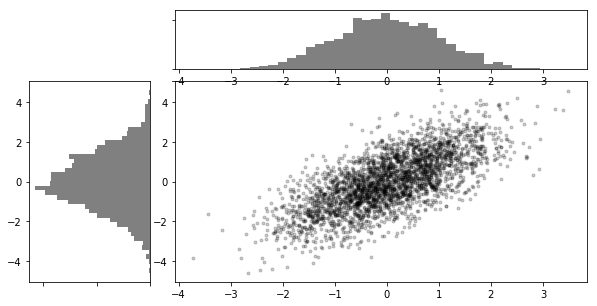

In [10]:
import numpy as np
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(10, 5))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:, 1:])
y_hist = fig.add_subplot(grid[1:, 0], xticklabels = [], sharey=main_ax) # <- bruker xticklabels [] for å bli kvitt.
x_hist = fig.add_subplot(grid[0, 1:], yticklabels = [],sharex=main_ax)

main_ax.plot(x,y, 'ok', alpha=0.2, markersize=3) # <- bruker plot med marker i stedet for scatter
x_hist.hist(x, 40, color='grey')
y_hist.hist(y, 40, color='grey', orientation='horizontal')
y_hist.invert_xaxis()

### Plots

Har mange ulike plotte-metoder i axes-objekt. Disse returnerer Artist-objekt eller en kolleksjon av disse. Som oftest trenger jeg ikke å jobbe med Artist direkte så det er ikke nødvendig å binde disse til variabelnavn. Det er konvensjon å kjøre uten variabelnavn i stedet for filler som _ = ax.plot(). Det finnes unntak der jeg trenger Artist (for eksempel for å lage colorbar).

#### plot

#### scatter

#### bar

```python
ax.bar(x, # plassering på x-akse
       y, # høyde
       width, # kan bruke x[1]-x[0] for å få skulder til skulder hvis samme avstand
       align, # center eller edge, bruker edge hvis bar er gjennomsnitt fra intervall..
       color, # farge på fill
       edgecolor, # must dersom de er skulder til skulder
       yerr, ecolor, capsize # innebygget funksjonalitet for errorbars
       )
```


#### fill

```python
ax.fill_between(x,y1,y2)
```

#### contour

Vi har vektøy for å kommunisere informasjon om flere dimensjoner i to-dimensjonalt plott (som tross alt er enklere å tolke og lage). Kan kommunisere dette gjennom valg av farge, symbol og størrelse på punktene. Farge og størrelse har kobling til kontinuerlig... kommuineser rangering. Bør bruke heatmap fra "lav til høy" dersom vi vil kommunisere dette. Symbol har ikke innebygd rangering. Uansett, jeg vil nå lage contourplot på grid som er den beste måten å visualisere funksjoner $f:\mathbb{R}^2\to\mathbb{R}$

Har to funksjoner med samme api:
1. ax.contour (linjer)
2. ax.contourf (fyller inn område mellom linje med farge)

```python
contour = ax.contour[f](X,Y,Z, # må binde objekt som blir returnert til variabel siden trenger under
                        levels = ,# n (antall nivå) eller array (funksjonverdier)
                        colors = , # spesifisere enkelt farge
                        cmap = , # navn på cmap eller instance av cmap objekt
                        )
fig.colorbar(contour) # hvis contourf
ax.clabel(contour) # hvis contour
```

### Workflow

#### En axes

1. Initialiserer figur og axes som over
2. ax.plot(x,y,options : linestyle, color, marker (matlab notasjon), label = ..)) 
3. ax.set (xlabel, ylabel, title.) # enkel wrapper funksjoner
4. ax.set_xlabel(.. ) # mer funksjonalitet en set()
4. ax.xaxis... # kan få tak i xticks, label padding mm
6. Hvis flere subplots så fig.subplots_adjust() for å redusere avstand mellom de.

#### Flere axes/subplots

fig,axes = plt,subplots(3,1,figsize())

for i in range(3):

    ax[i].set_title(df.columns[i])
    
    df[df.columns[i]].hist(ax=ax[i],bins=40)

### Skrive plot inni funksjon

### Customize plot

Hvis jeg vil at axes skal dele axis med andre axes slik at bare trenger å endre én av de kan jeg spesifisere sharex=True i konstruksjon av subplots, eller jeg eksplisitt si at én axes må dele med spesifikk annen axes.

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

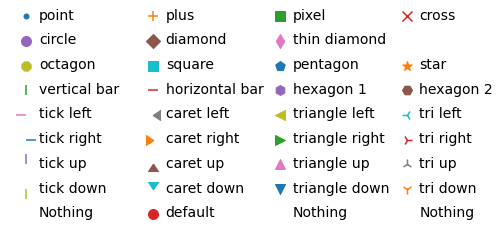

In [17]:
import matplotlib.pyplot as plt
import numpy as np
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "default", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()
plt.show()

#### Ticks

ax.set_xticks() for å sette ticks. 

Hvis vi har lyst til å legge til symbol/text for hver tick kan vi gjøre:

vals = ax.get_ticks() -> ax.set_xticklabels([str(x)+'..' for x in vals])

#### Titler

ax.title.set_text('..') for å sette subtitle på subplots

Bruker raw string, r'$..$' for å skrive latex i titler, trenger for å bruke \beta mm

#### Legend

fjerne bakgrunn i legend med framealpha=0

#### markers

kan plotte tomme sirkler med edgecolors='color', facecolor='none'

#### ramme (spines)

Kan være relevant å endre på rammene
- ax.spines['right'].set_visible(False) #fjerne spine
- ax.spines['right'].set_position((type,amount)) # eks ('data',0), finnes tre ulike types: 'outward', 'data' og ..

Hvis jeg vil ha felles axis på subplots over flere rader, så kan jeg lage et ax-objekt i bakgrunnen og fjerne spines/grid. Deretter spesifiserer axis på dette ax-objektet. 

#### farge

Bruker strings til å spesifisere farge. Mapper sikkert til noe objekt i matplotlib..

- Enkel bokstav for enkle fergar, `b` er blå
- Kan bruke `tab:blue` for å få tilsvarende farge fra tableu
- Finnes en lang rekke andre farger som må spesifiseres med hele navn, eks `salmon`
- Kan også spesifiseres med hex-kode fra html/css, men tror ikke det er så relevant

Tror jeg kan spesifisere c=vektor og så spesifisere cmap=plt.get_cmap('jet'), colorbar=True)

kan forøvrig også spesifisere størrelse på denne måten

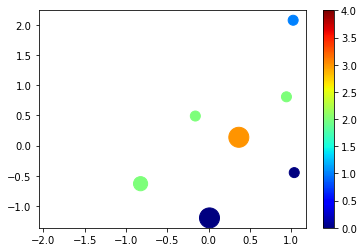

In [4]:
fig, ax = plt.subplots()
im = ax.scatter(x1,x2, c=x3, cmap=plt.get_cmap('jet'), s=x4*100)
fig.colorbar(im)

Vet ikke hvorfor jeg noensinne har lyst til å bruke eksplisitt cmap objekt i stedet for å skrive inn navnet som string siden matplotlib kan inferre. Kanskje relevant dersom jeg vil lage custom...

##### Colormap

Når vi lager plots er det mange Aritster som inheriter fra ScalarMappable (scatter, imshow, pcolor,..) og derfor har felles argument,
- `cmap`, hvilke fargekart
- `vmin`, hvilken verdi som korresponderer med bunn
- `vmax`, og topp. Kan inferres fra data, men greit å spesifisere dersom bruke samme kart på flere axes
- `norm`, hvis vi for eksempel vil ha logaritmisk skalering i valg av farge

disse argumentene feeded inn i im = ax.[func](..., cmap=..,...)

Deretter bruker vi fig.colorbar(im, ...). Dette er en figurmetode som i default krymper den eksisterende axes og legger til en ny axes inne i figuren der colorbar får plass. Kan eventuelt lage colorbar axes (cax) manuelt å spesifisere det som argument.

Må velge colormap som formidler riktig informasjon til leser av figuren.
1. Sequential: kontinuerlig verdi, lav til høy, gjerne samme farge med ulik intensitet. Blå hvis bra, rød hvis dårlig.
2. Diverging: tilsvarende som over, men med naturlig midtpunkt/nullpunkt. Blå til rød.
3. Kvalitativ: diskret, ulike farger som ikke gir inntrykk av bra eller dårlig.

Finnes lang rekke colormap objekter i matplotlib. For disse er det tilstrekkelig å spesifisere navn som string. Kan i prinsippet lage mine egne ved å spesifisere farger, men tror ikke dette er relevant.

### Legge til tekst inne i figuren

Text(0.4, 0.8, 'Sverre var også her')

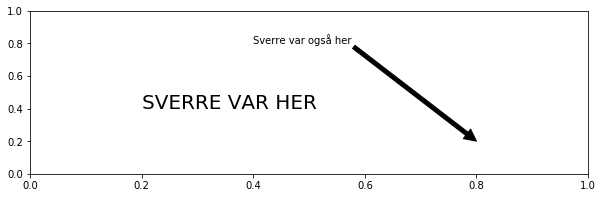

In [94]:
fig, ax = plt.subplots(figsize=(10,3))
ax.text(0.2,0.4,s="SVERRE VAR HER",fontsize=20)

ax.annotate(s="Sverre var også her",xy=(0.8,0.2),xytext=(0.4,0.8),
            arrowprops=dict(facecolor="black", shrink=1)) #bruk arrowstyle:'->' for enkel pil


### Plotte vektorer

Kan plotte enkeltvektorer med:

plt.quiver(x_0,y_0,x_1,y_1, scale=1)

funksjonen kan også plotte såkalt vector field. Har da form

plt.quiver(X,Y,U,V)

der input er X,Y er matriser fra meshgrid og jeg må konstruere U,V ved å evaluere partielle derivert i korresponderende element fra X,Y

### 3d plot

Må begynne med å importere Axes3d objekt, from mpl_toolkits.mplot3d import Axes3D. Deretter

1. fig = plt.figure(figsize=..)
2. ax = fig.add_subplot(111,projection="3d")

Har da et en operativ 3d ax som vi kan plotte inn data på. Vet ikke hva 111 gjør. Trenger at x og y verdier (verdi på akse) kommer fra meshgrid, x,y=meshgrid(values1,values2). 

3. ax.scatter(x,y,z,..)
4. ax.plot_surface(x,y,z,cmap="terrain")
5. ax.contour3D()

Endre vinkel med Axes3D.view_init .. kan bruke til å lage video.. hmmm..

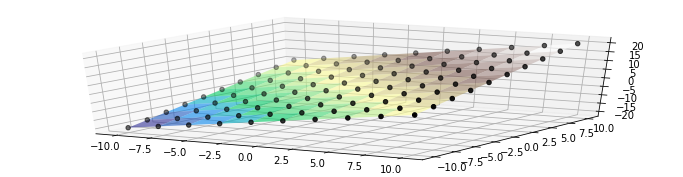

In [3]:
# Eksempel:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

values = np.linspace(-10,10,10)
x,y = np.meshgrid(values,values)
z = x+y

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111,projection="3d")
ax.plot_surface(x,y,z,cmap="terrain",alpha=0.6)
ax.scatter(x,y,z, color="black")

#### Domain

Kan håndtere domain i funksjoner av to variabler der domain avhenger av forhold mellom verdier (f.eks x<y) gjennom å konstruere en bool matrix og sette verdi til 0 eller np.nan der ikke oppfylt, eg:

Endre vinkel med Axes3D.view_init .. kan bruke til å lage video.. hmmm..

### Andre nyttige funksjoner

- axes.clear(), bruker den hvis vi vil gjenbruke samme figur for et nytt plot i stedet for å definere nytt figurobjekt eller lage ny axes til den eksisterende figuren.
- df.sample(n = , eller frac = ) <- nyttig dersom vi har et stort datasett og vi vil lage scatterplot. Også nyttig dersom veldig skjev fordeling mellom delpopulasjoner.
- ax.set_xlabel('...', x=1) <- gir oss label ved enden av axis slik som konvensjon i matte
- ax.set_ylabel('..', y=1, rotation=0, labelpad=8) <- tilsvarende for y, må sikkert flytte den ut med labelpad for ikke overlapp når vi roterer.
- ax.inset_axes([left,bottom,widht,height]) lar oss legge til axes inni ax i subplots

### Visualisere diskret fordeling

Hvis jeg har en vektor y med diskret verdier kan jeg først få ut arrays med unike verdier og antall med

unique, counts = np.unique(y,return_counts=1)

counts = counts/sum(counts)

plt.vlines(unique,0,counts,lw=4) #lw er linewidth

### Annet

bruker fig.thight_layout() i subplots. Tror den prøver å inferre best mulig padding slik at ting ikke overlapper og sånn.

Finnes flere måter å sende inn kwargs. 

1. plt.plot(..., color='', linetype='',...)
2. kwargs = dict(color:'', linetype:'',..), plt.plot(...,**kwargs)
3. 'b-'


Kan fargelegge område mellom kurver med

ax.fill_between(x,y1,y2,where=), der x bare er x-grid, y1 og y2 er kurvene, og where kan være y1>y2

bruke ax.hlines/ax.vlines til å lage rette linjer. Disse kommer bak andre plot på axen. Hvis jeg vil ha de i forgrunnen så kan jeg lage linjen med vanlig plot()

Hvis jeg vil plotte data med ulike skala på samme axes, så kan jeg legge en ny axes ovenpå og jobbe med de seperat.

```python
fig, ax = plt.subplots()
ax1 = ax.twinax()
```

## Seaborn

Bruker matplotlib kode under the hood. Fordelen med seaborn er at den reduserer behov for boilerplate kode på standardplot, får det fint med færre linjer, har god integrasjon med pandas (kan bruke df som input, ikke bare individuelle series), har mer estetiske defaults.


### palette

Kan bestemme palette globalt med sns.set_palette("...") som tar litt ulike strings. Det er variasjoner av default palette:
deep, muted, pastel, bright, dark, and colorblind.

Har i tillegg såkalte COLOR BREWER PALETTES

sequential, divergent, .. hvis ordinal inndeling så vil jeg gjerne at det skal indikere rangeringen. Hvis ren kategorisk data trenger det ikek være mønster i farge.

## Altair

Vil ha interaktive plot. TODO.

## Graphviz

Pakke for å visualisere grafer. Vil i utgangspunktet bruke det til å visualisere beslutningstrær men tror det kan ha andre anvendelser.

Tror det er litt mer generell software enn bare python pakke. Litt slitsomt at jeg må jobbe eksplisitt med filer lagret i systemet i stedet for objekter i python.

Tror det har out-fil i dot-format, som jeg konverterer til bilde format..

bruker først export_graphviz fra sklearn.tree til å lage graf i .dot format med utgangspunkt i mitt fittede beslutningstre. Deretter kan jeg spesifisere grafiske renderinger på denne filen for å få det i bilde-format, enten fra command line eller inni python

```python
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(
                tree_clf,
                out_file='fig.dot',
                feature_names= ..,
                class_names= ..,
                rounded=True,
                filled=True
                )
Source.from_file('fig.dot') # Får Source objekt som kan visulaiseres i notebook. Kan også lagre til fil som .png osv..
```